# Telco Data: Customer Churn Supposition


## Imports

More than a quarter of the Telco customers churn.
I ask the following questions and will use tests used in data science scenarios to determine if one of the four factors contributes more than the others to the customer churn percentage.
1. Does having tech support affect customer churn rates?
2. Does payment type affect customer churn rates?
3. Does being a senior citizen affect customer churn rates?
4. Does contract type affect customer churn rates?


In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import env
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import re
import telco_wrangle as tw
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

## Acquire

* I retrieved my data from the Codeup databases using my acquire.py file
* I retrieved my data on Tuesday, October 25, 2022
* What is the size of your data? There are 24 columns and 7043
* What does each observation represent? Each observation represents the customer's account information 
* What does each column represent? Each column represent a piece of information about the customer's account.  Initial columns represent 

In [3]:
#retrieve data from Codeup sequel database using telco_wrangle 
df = tw.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# use info to see column names, check for nulls, and datatype. There are 7043 rows and 24 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [5]:
# check spread of data
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


## Prepare


In [6]:
# see churn rates
df.churn.value_counts() 

No     5174
Yes    1869
Name: churn, dtype: int64

In [7]:
# calculate baseline
# This is a huge churn percentage
churn_baseline = 1869/(5174 + 1869) * 100
churn_baseline

26.536987079369588

In [8]:
# split the data
train, validate, test = tw.prep_telco_data(df)

In [9]:
train.head()

,payment_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,tech_support_No,tech_support_No internet service,tech_support_Yes,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,contract_type_Month-to-month,contract_type_One year,contract_type_Two year
5919,4,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,One year,DSL,Credit card (automatic),1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1915,4,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic),0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
5054,1,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,Month-to-month,None,Electronic check,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2355,2,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,Month-to-month,None,Mailed check,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
6279,2,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,One year,DSL,Mailed check,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [10]:
# use info to see column names, check for nulls, and datatype. There are 3937 rows and 51 columns
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   payment_type_id                         3937 non-null   int64  
 1   gender                                  3937 non-null   object 
 2   senior_citizen                          3937 non-null   int64  
 3   partner                                 3937 non-null   object 
 4   dependents                              3937 non-null   object 
 5   tenure                                  3937 non-null   int64  
 6   phone_service                           3937 non-null   object 
 7   multiple_lines                          3937 non-null   object 
 8   online_security                         3937 non-null   object 
 9   online_backup                           3937 non-null   object 
 10  device_protection                       3937 non-null   o

In [11]:
# see churn values
train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [12]:
train.senior_citizen = train.senior_citizen.replace({0: 'No', 1: 'Yes'})
train.senior_citizen.value_counts()

No     3302
Yes     635
Name: senior_citizen, dtype: int64

In [25]:
train.senior_citizen = train.senior_citizen.replace({0: 'No', 1: 'Yes'})
train.senior_citizen.value_counts('Yes')

No     0.83871
Yes    0.16129
Name: senior_citizen, dtype: float64

In [16]:
senior=train.senior_citizen.value_counts()

In [17]:
senior

No     3302
Yes     635
Name: senior_citizen, dtype: int64

In [18]:
train.tech_support.value_counts()

No                     1931
Yes                    1139
No internet service     867
Name: tech_support, dtype: int64

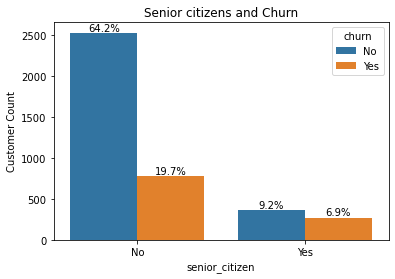

In [27]:
# plot
ax= sns.countplot(x="senior_citizen", hue="churn", data=train)
ax.set(ylabel='Customer Count', title='Senior citizens and Churn')

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/train.senior_citizen.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')


plt.show()

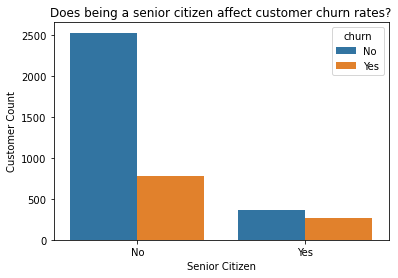

In [13]:
ax=sns.countplot(x="senior_citizen", hue="churn", data=train)
plt.title("Does being a senior citizen affect customer churn rates?")
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(dict(col1=np.array([2, 4, 1, 1, 1, 4])))

ax = sns.countplot(x="col1", data=df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

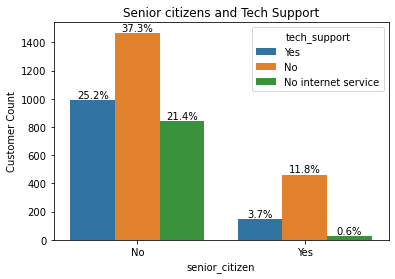

In [23]:
# plot
ax= sns.countplot(x="senior_citizen", hue="tech_support", data=train)
ax.set(ylabel='Customer Count', title='Senior citizens and Tech Support')

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/train.tech_support.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

NameError: name 'total' is not defined

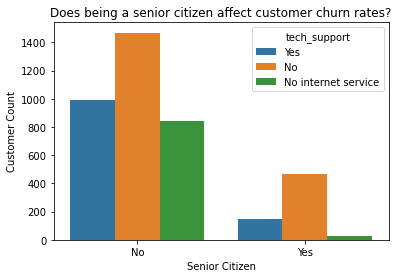

In [20]:
ax= sns.countplot(x="senior_citizen", hue="tech_support", data=train)
plt.title("Senior citizens and Tech Support")
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
train.head()

In [ ]:
train.churn_encoded.value_counts()

In [ ]:
sns.color_palette("tab10")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [73, 27]
labels = ['Retained customers','Churned Customers']

#define Seaborn color palette to use
colors = sns.color_palette('tab10')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#define data
data = [train.churn_encoded]
labels = ["Churned", 'Retained']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [ ]:
# comparing the before and after churn value comparison
#churn_baseline = 1869/(5174 + 1869) * 100
#churn_baseline =26.536987079369588

train_churn_baseline = 1046/(2891+1046)* 100
train_churn_baseline

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn_encoded'])
y_train = train.churn_encoded

X_validate = validate.drop(columns=['churn_encoded'])
y_validate = validate.churn_encoded

X_test = test.drop(columns=['churn_encoded'])
y_test = test.churn_encoded


# Explore



## 1. Does having tech support affect customer churn rates?


In [ ]:
train.tech_support

In [ ]:
train.tech_support_Yes.value_counts()


In [ ]:
train.tech_support_Yes.value_counts(normalize=True)


In [ ]:
print('Is there a relationship between tech support and churn?')
pd.crosstab(train.tech_support_Yes, y_train, normalize='index').style.background_gradient(cmap='Greens')


In [ ]:
plt.title("Churn Rates")
train.churn_encoded.hist()
plt.show()

In [ ]:
plt.title("Senior Citizens")
train.senior_citizen.hist()
plt.show()

In [ ]:
train.senior_citizen.value_counts(normalize=True)


In [ ]:
plt.title("Payment Type")
train.payment_type.hist()
plt.show()

In [ ]:
train.payment_type.value_counts(normalize=True)

In [ ]:
plt.title("contract_type")
train.contract_type.hist()
plt.show()

In [ ]:
train.contract_type.value_counts(normalize=True)


In [ ]:
pd.crosstab(train.tech_support_Yes, train.churn, normalize='index').plot.bar(stacked=False)
pd.crosstab(train.payment_type, train.churn, normalize='index').plot.bar(stacked=False)
pd.crosstab(train.senior_citizen, train.churn, normalize='index').plot.bar(stacked=False)
pd.crosstab(train.contract_type, train.churn, normalize='index').plot.bar(stacked=False)


In [ ]:
churn_valcount = train.churn.value_counts()

In [ ]:
churn_valcount

In [ ]:
churn_rate = churn_valcount.mean()

In [ ]:
churn_rate

In [ ]:
sns.countplot(x="senior_citizen", hue="churn", data=train)
plt.title("Does being a senior citizen affect customer churn rates?")
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
plt.show()

In [ ]:
sns.countplot(x="tech_support_No", hue="churn", data=train)
plt.title("Does having tech support affect customer churn rates?")
plt.xlabel("Tech Support")
plt.ylabel("Customer Count")
plt.show()

In [ ]:
plt.title("Does having tech support affect customer churn rates?")
sns.countplot(x="tech_support_Yes", hue="churn", data=train)
churn_rate = churn_valcount.mean()
plt.legend()
plt.show()


In [ ]:
plt.title("Does payment type affect customer churn rates?")
sns.countplot(x="payment_type", hue="churn", data=train)
churn_rate = churn_valcount.mean()
plt.legend()
plt.show()
#After seeing this, I wondered why the electronic check had such a higher churn rate.

In [ ]:
plt.title("Does being a senior citizen affect customer churn rates?")
sns.countplot(x="senior_citizen", hue="churn", data=train)
churn_rate = churn_valcount.mean()
plt.legend()
plt.show()

In [ ]:
plt.title("Does contract type affect customer churn rates?")
sns.countplot(x="contract_type", hue="churn", data=train)
churn_rate = churn_valcount.mean()
plt.legend()
plt.show()
#This is the best visual of the 4 questions, so far.

In [ ]:
y_train[:5]


In [ ]:
X_train.shape, X_validate.shape, X_test.shape

In [ ]:
y_train.shape, y_validate.shape, y_test.shape

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.¶

In [ ]:
y_train[0:10]


In [ ]:
y_train.value_counts()


In [ ]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

In [ ]:
# Run a chi squared to compare proportions to verify the visualization 
alpha = 0.05
null_hypothesis = "There is not a relationship between churn and payment type."
alternative_hypothesis = "There is a relationship between churn and payment type."

# Setup a crosstab of observed churn and tech support
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that.", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null.")

p

In [ ]:
# Run a chi squared to compare proportions to verify the visualization 
alpha = 0.05
null_hypothesis = "There is not a relationship between churn and senior citizens."
alternative_hypothesis = "There is a relationship between churn and senior citizens."

# Setup a crosstab of observed churn and tech support
observed = pd.crosstab(train.churn, train.senior_citizen)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null.")

p

In [ ]:
# Run a chi squared to compare proportions to verify the visualization 
alpha = 0.05
null_hypothesis = "There is not a relationship between churn and contract type."
alternative_hypothesis = "There is a relationship between churn and contract type."

# Setup a crosstab of observed churn and tech support
observed = pd.crosstab(train.churn, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null.")

p

In [ ]:
# take a look at the results
X_train.head()

In [ ]:
print('Is there a relationship between payment_type_Bank transfer and churn?')
pd.crosstab(X_train.payment_type, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between being a senior citizen and churn?')
pd.crosstab(X_train.senior_citizen, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between contract type and churn?')
pd.crosstab(X_train.contract_type, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
print('Is there a relationship between auto payments vs manual payments and churn?')
pd.crosstab(X_train.payment_type_Mailed check, y_train, normalize='index').style.background_gradient(cmap='Greens')

In [ ]:
sns.boxplot(data=train, y='monthly_charges', x='churn')
plt.title('Do customers that churn pay more per month?')
plt.show()


In [ ]:
pd.crosstab(train.gender, train.churn, normalize='index').plot.bar(stacked=False)
plt.gca().yaxis.set_major_formatter('{:.0%}'.format)
plt.xticks(rotation=0)
plt.title('IS there a difference in gender between churners and non-churners?')
plt.show()


In [ ]:
df['month_to_month_contract'] = (df.contract_type == 'Month-to-month').astype(int)

# Recreate splits since a new column was added
X = df.drop(columns=['churn'])
y = df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=123)


In [ ]:
features = ['monthly_charges', 'month_to_month_contract']


In [ ]:
X_train[features].head()

In [ ]:
senior = train['senior_citizen'].value_counts()
senior

In [ ]:
churned = train['churn_encoded'].value_counts()
churned

In [ ]:
tech = train['tech_support'].value_counts()
tech

In [ ]:
one_year = train['contract_type_One year'].value_counts()
one_year

In [ ]:
two_year= train['contract_type_Two year'].value_counts()
two_year

In [ ]:
monthly = train['contract_type_Month-to-month'].value_counts()
monthly

In [ ]:
# Used chi squared to compare proportions result
alpha = 0.05
null_hypothesis = "There is not a relationship between churn and tech support."
alternative_hypothesis = "There is a relationship between churn and tech support."

# Setup a crosstab of observed churn and tech support
observed = pd.crosstab(train.churn, train.tech_support_Yes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that.", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null.")

p

In [ ]:
transfer = train['payment_type_Bank transfer (automatic)'].value_counts()
transfer

In [ ]:
credit = train['payment_type_Credit card (automatic)'].value_counts()
credit

In [ ]:
electronic = train['payment_type_Electronic check'].value_counts()
electronic

In [ ]:
mailed = train['payment_type_Mailed check'].value_counts()
mailed

In [ ]:
auto = transfer[1] + credit[1]
auto

In [ ]:
check = electronic[1] + mailed[1]
check

In [ ]:
#We'll create several different models and compare their performance.


model1 = DecisionTreeClassifier(max_depth=2)
model1.fit(X_train[features], y_train)
accuracy = model1.score(X_validate[features], y_validate)
print(f'Model 1 Accuracy: {accuracy:.2%}')

In [ ]:
plt.figure(figsize=(13, 7))
plot_tree(model1, feature_names=features, class_names=['No Churn', 'Churn'])
plt.show()


In [ ]:
Model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train[features], y_train)
accuracy = model2.score(X_validate[features], y_validate)
print(f'Model 2 Accuracy: {accuracy:.2%}')

In [ ]:
model3 = DecisionTreeClassifier(max_depth=4)
model3.fit(X_train[features], y_train)
accuracy = model3.score(X_validate[features], y_validate)
print(f'Model 3 Accuracy: {accuracy:.2%}')


## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [ ]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [ ]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production